In [1]:
import pandas as pd

import sys
sys.path.append("..")

import multi_prophet

## Data set

In [2]:
df = pd.read_csv("../tests/data/retail_sales.csv")
df["y1"] = df["y"].apply(lambda x: x + 10 * x / 100)
df.head()

,ds,y,y1
0,1992-01-01,146376,161013.6
1,1992-02-01,147079,161786.9
2,1992-03-01,159336,175269.6
3,1992-04-01,163669,180035.9
4,1992-05-01,170068,187074.8


## Define the model with same configuration, fit and predict

In [3]:
m = multi_prophet.MultiProphet(columns=["y", "y1"], growth="linear")
m.fit(df)

future_df = m.make_future_dataframe(periods=10)
forecast = m.predict(future_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future_df.tail()

,ds
298,2016-05-07
299,2016-05-08
300,2016-05-09
301,2016-05-10
302,2016-05-11


In [5]:
forecast["y"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
298,2016-05-07,481542.508585,470667.588891,491330.912653
299,2016-05-08,483209.950158,472829.465676,493423.690139
300,2016-05-09,484920.283302,475001.808072,495117.489599
301,2016-05-10,486617.341971,476321.969226,497551.384337
302,2016-05-11,488244.125356,478484.939083,498675.396562


In [6]:
forecast["y1"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
298,2016-05-07,529930.264498,518635.207828,542159.770400
299,2016-05-08,531785.138729,520279.634725,543033.679660
300,2016-05-09,533691.658031,522146.673663,544735.498518
301,2016-05-10,535586.816209,523972.286678,546819.145474
302,2016-05-11,537406.633812,526370.000363,549244.767976


## Plot results

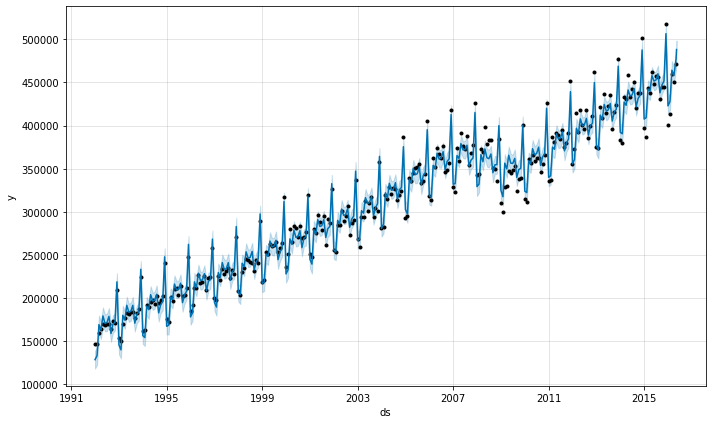

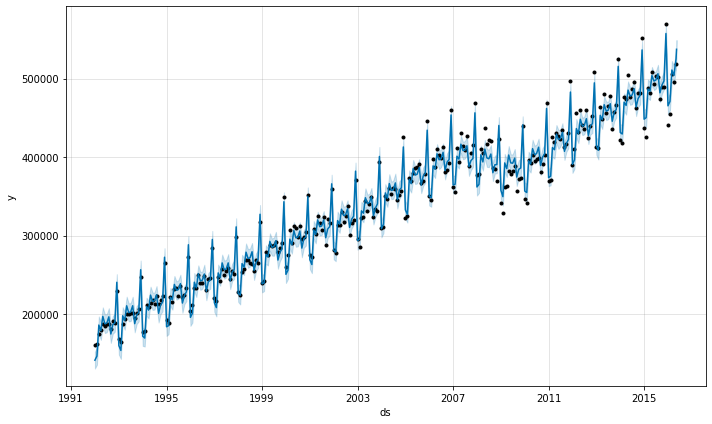

In [7]:
plots = m.plot(forecast)

## How the predictions look

In [8]:
forecast["y"].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,162739.164825,118194.014032,138722.482973,162739.164825,162739.164825,-34235.527316,-34235.527316,-34235.527316,-34235.527316,-34235.527316,-34235.527316,0.0,0.0,0.0,128503.637509
1,1992-02-01,163790.972479,122498.726763,143559.183658,163790.972479,163790.972479,-30560.893675,-30560.893675,-30560.893675,-30560.893675,-30560.893675,-30560.893675,0.0,0.0,0.0,133230.078804
2,1992-03-01,164774.921574,159244.280114,179775.873810,164774.921574,164774.921574,4378.432408,4378.432408,4378.432408,4378.432408,4378.432408,4378.432408,0.0,0.0,0.0,169153.353982
3,1992-04-01,165826.729228,152519.731555,172874.401572,165826.729228,165826.729228,-3166.205444,-3166.205444,-3166.205444,-3166.205444,-3166.205444,-3166.205444,0.0,0.0,0.0,162660.523783
4,1992-05-01,166844.607602,168127.101313,189120.744999,166844.607602,166844.607602,12377.335308,12377.335308,12377.335308,12377.335308,12377.335308,12377.335308,0.0,0.0,0.0,179221.942910


In [9]:
forecast["y1"].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,179015.771637,130716.219545,152132.839775,179015.771637,179015.771637,-37658.322541,-37658.322541,-37658.322541,-37658.322541,-37658.322541,-37658.322541,0.0,0.0,0.0,141357.449096
1,1992-02-01,180173.844229,135617.276816,158008.356023,180173.844229,180173.844229,-33585.744634,-33585.744634,-33585.744634,-33585.744634,-33585.744634,-33585.744634,0.0,0.0,0.0,146588.099595
2,1992-03-01,181257.202460,174848.030977,197097.785468,181257.202460,181257.202460,4855.796349,4855.796349,4855.796349,4855.796349,4855.796349,4855.796349,0.0,0.0,0.0,186112.998809
3,1992-04-01,182415.275052,167195.810054,189807.405712,182415.275052,182415.275052,-3497.362161,-3497.362161,-3497.362161,-3497.362161,-3497.362161,-3497.362161,0.0,0.0,0.0,178917.912891
4,1992-05-01,183535.990464,185748.057587,208701.832655,183535.990464,183535.990464,13570.437992,13570.437992,13570.437992,13570.437992,13570.437992,13570.437992,0.0,0.0,0.0,197106.428456


## Define the model with different configuration, fit and predict

In [10]:
config = {
    "y": {"weekly_seasonality": True, "seasonality_mode": "additive"},
    "y1": {"yearly_seasonality": True, "seasonality_mode": "multiplicative"}
}
m = multi_prophet.MultiProphet(columns=["y", "y1"], config=config)
m.fit(df)

future_df = m.make_future_dataframe(periods=10)
forecast = m.predict(future_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Plot results

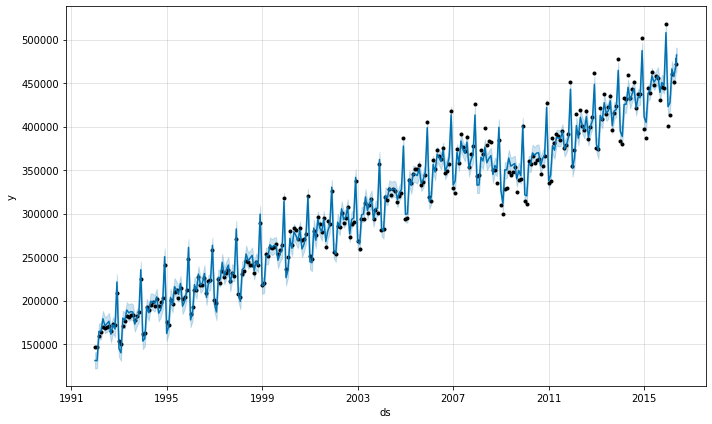

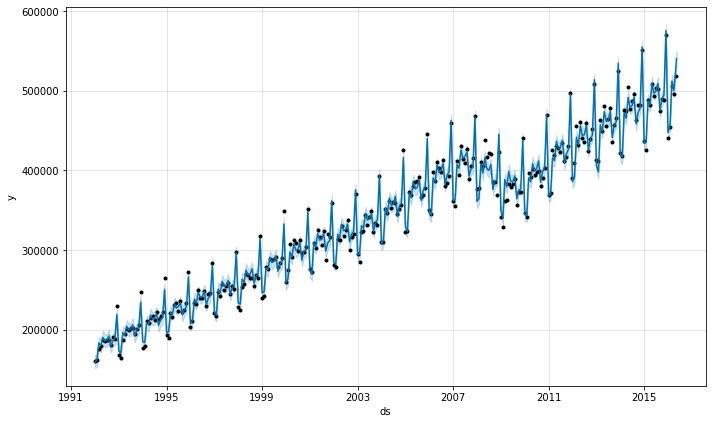

In [11]:
plots = m.plot(forecast)